In [1]:
# Importing the libraries
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer
import os
import matplotlib.pyplot as plt
from pickle import dump, load

%matplotlib inline

In [2]:
# Setting up directory paths
base_dir = "/mnt/c/Users/ransh/Documents/IE University/Year 5/Sem1/MLOps/cern_classifer/"
data_dir = 'data/raw/'

# Changing the working directory 
os.chdir(base_dir)


In [3]:
# Importing the Data 
train_main = pd.read_csv(data_dir + 'train_main.csv')
train_collision = pd.read_csv(data_dir + 'train_collision.csv')

test_main = pd.read_csv(data_dir + 'test_main.csv')
test_collision = pd.read_csv(data_dir + 'test_collision.csv')

In [4]:
print(f'The Main train dataset has a shape of {train_main.shape}')
print(f'The collision train dataset has a shape of {train_collision.shape}')

print(f'\nThe Main test dataset has a shape of {test_main.shape}')
print(f'The collision test dataset has a shape of {test_collision.shape}')

The Main train dataset has a shape of (12918, 5)
The collision train dataset has a shape of (12918, 14)

The Main test dataset has a shape of (8613, 4)
The collision test dataset has a shape of (8613, 14)


In [5]:
train_main.head() 

,id,Run,Lumi,Event,jets
0,1,147926,463,499379866,trijet
1,2,147926,466,502201110,trijet
2,3,149181,992,977223571,tetrajet
3,4,149181,1802,1701566563,bijet
4,5,148029,395,307976436,tetrajet


In [6]:
train_collision.head()

,id,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,2389,628.650,0.003689,344.471,1.97683,-106.3260,258.073,355.6340,5.65705,88.32750,-344.20000,211.617,13.65300,0
1,9073,238.291,0.018975,270.023,101.12500,46.4665,-245.698,94.0115,-87.19800,-9.75658,-25.68270,199.032,10.47860,0
2,7406,1047.610,0.002073,NaN,-57.70030,47.2421,425.894,635.2590,70.86140,-20.33610,-630.79900,226.173,25.82460,0
3,2171,227.925,0.002685,155.943,-102.58900,-5.2552,116.311,112.2300,102.59800,4.14457,4.48955,206.631,1.36038,0
4,12189,207.339,0.039911,158.584,-84.84940,71.5817,-112.407,222.8720,26.13380,-78.36290,-206.39200,193.617,14.76390,0


In [7]:
test_main.head() 

,id,Run,Lumi,Event
0,12919,149181,986,970832428
1,12920,148029,388,302823375
2,12921,147926,465,500653165
3,12922,149181,998,982740964
4,12923,149181,999,983919377


In [8]:
test_collision.head()

,id,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
0,21519,413.358,0.007247,303.461,129.245,-88.8368,259.134,162.125,-139.8620,58.7003,-50.84160,308.513,7.95099,0
1,17571,433.400,0.012239,586.030,-158.880,-156.0780,541.144,293.401,131.9080,133.0470,205.13400,421.112,10.32080,0
2,14067,727.283,0.005070,222.582,135.759,-33.9291,-171.341,687.033,-121.4970,44.5075,619.90500,350.553,18.73220,0
3,21109,264.239,0.011179,621.691,58.944,-51.0865,-595.472,50.216,-35.3176,34.8864,1.36373,216.692,15.76590,0
4,20966,252.714,0.043178,256.421,-92.690,-86.8980,-222.060,379.302,71.1955,93.5246,-360.36800,244.594,21.02260,0


1. Data Joining

In [9]:
# Merging the train dataset based on the id column
all_train = pd.merge(train_main, train_collision, on='id')
all_train.head()
all_train.to_csv("data/interim/train.csv", index=False)

In [10]:
# Merging the test dataset based on the id column
all_test = pd.merge(test_main, test_collision, on='id')
all_test.head()
all_test.to_csv("data/interim/test.csv", index=False)

2. Data Exploration

In [11]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12918 entries, 0 to 12917
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12918 non-null  int64  
 1   Run     12918 non-null  int64  
 2   Lumi    12918 non-null  int64  
 3   Event   12918 non-null  int64  
 4   jets    12918 non-null  object 
 5   MR      10335 non-null  float64
 6   Rsq     12918 non-null  float64
 7   E1      11627 non-null  float64
 8   Px1     12918 non-null  float64
 9   Py1     12918 non-null  float64
 10  Pz1     12918 non-null  float64
 11  E2      12918 non-null  float64
 12  Px2     12918 non-null  float64
 13  Py2     12918 non-null  float64
 14  Pz2     12918 non-null  float64
 15  HT      12918 non-null  float64
 16  MET     12918 non-null  float64
 17  nBJets  12918 non-null  int64  
dtypes: float64(12), int64(5), object(1)
memory usage: 1.8+ MB


In [12]:
all_train.describe()

,id,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nBJets
count,12918.000000,12918.000000,12918.000000,1.291800e+04,10335.000000,12918.000000,11627.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.000000,12918.00000,12918.000000,12918.000000
mean,6459.500000,148666.467023,900.238350,8.630379e+08,347.854846,0.023484,293.569329,-0.708367,0.678810,-10.904041,275.598779,0.344767,-0.911184,-1.341925,239.86144,15.934446,0.055117
std,3729.249723,595.880402,496.162612,4.785053e+08,189.854140,0.023320,221.136545,90.680332,90.189393,337.760002,207.764762,75.845564,75.034815,321.458725,74.43428,10.846317,0.239473
min,1.000000,147926.000000,388.000000,3.023155e+08,64.622700,0.000009,47.317300,-342.210000,-581.178000,-1835.450000,42.048600,-395.124000,-426.243000,-1647.600000,120.93800,0.100445,0.000000
25%,3230.250000,148029.000000,462.000000,4.975961e+08,228.627000,0.007992,143.441500,-78.765575,-75.835350,-148.173000,125.559000,-62.800500,-62.669850,-150.168250,192.53450,8.544250,0.000000
50%,6459.500000,149181.000000,986.000000,9.708816e+08,289.674000,0.017122,210.133000,-2.394620,0.802189,-5.806435,200.595000,0.811811,-1.243045,-1.507775,222.59150,14.001950,0.000000
75%,9688.750000,149181.000000,999.000000,9.844653e+08,403.117500,0.031978,368.073500,77.834775,77.738075,134.158000,362.903750,63.217725,60.869675,148.800750,266.72050,21.009675,0.000000
max,12918.000000,149181.000000,1804.000000,1.703645e+09,2433.820000,0.726316,1849.800000,471.036000,442.558000,1609.590000,1843.360000,340.501000,483.755000,1830.370000,1078.12000,423.144000,2.000000


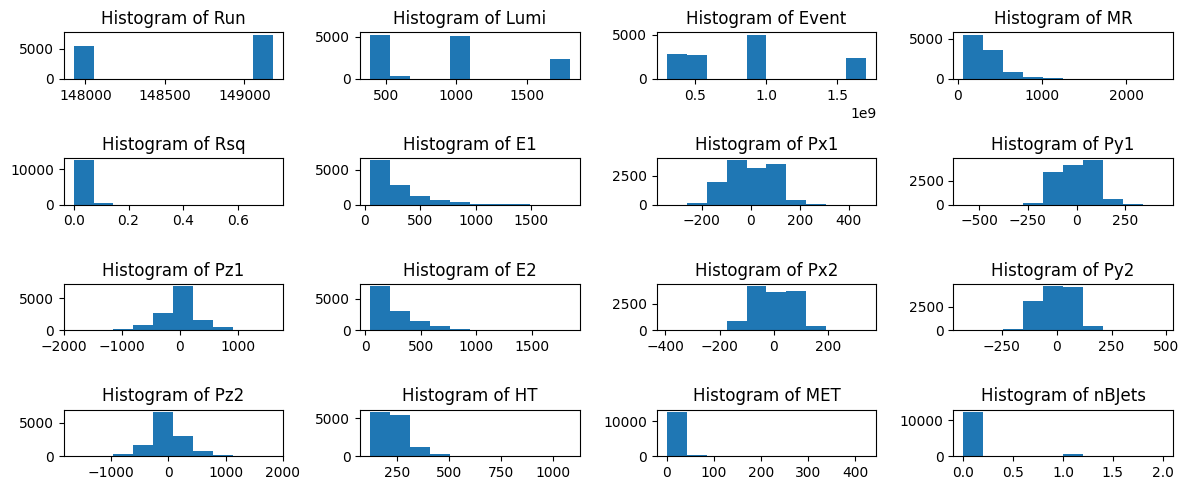

In [13]:
num_cols = [col for col in all_train.columns[1:] if all_train[col].dtype != 'O']
fig, axes = plt.subplots(4, 4, figsize=(12, 5))  # 4 rows, 4 columns
axes = axes.flatten()

for i, col_name in enumerate(num_cols):
    axes[i].hist(all_train[col_name])
    axes[i].set_title(f'Histogram of {col_name}')

plt.tight_layout()
plt.show()

In [14]:
for col in num_cols:
    if all_train[col].nunique() <= 6:
        print(f'{col}: {all_train[col].nunique()}')

Run: 4
nBJets: 3


3. Data Cleaning

In [15]:
# Checking for missing values
(all_train.isnull().sum()/all_train.shape[0])*100

id         0.000000
Run        0.000000
Lumi       0.000000
Event      0.000000
jets       0.000000
MR        19.995355
Rsq        0.000000
E1         9.993807
Px1        0.000000
Py1        0.000000
Pz1        0.000000
E2         0.000000
Px2        0.000000
Py2        0.000000
Pz2        0.000000
HT         0.000000
MET        0.000000
nBJets     0.000000
dtype: float64

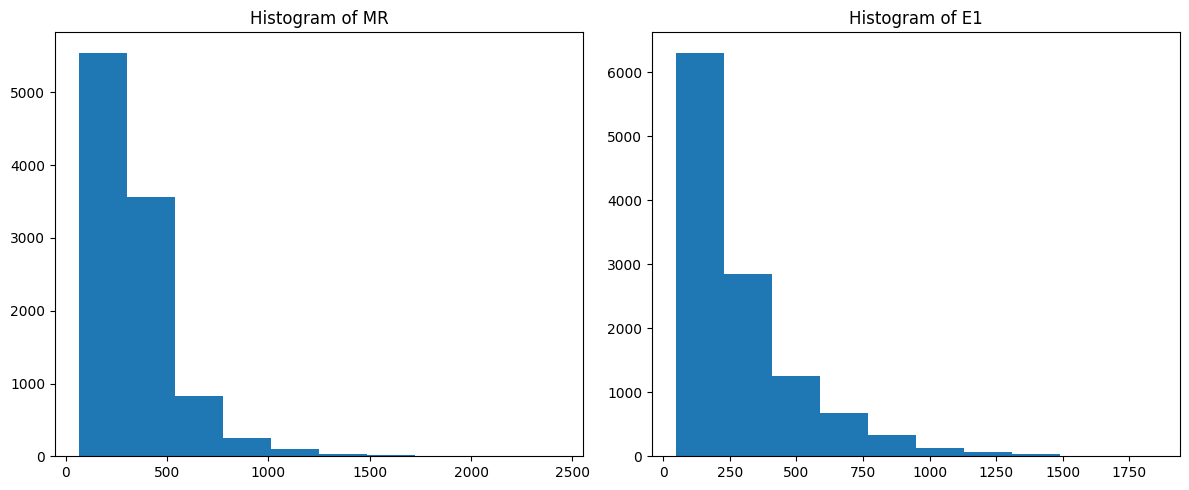

In [16]:
missing_value_cols = ['MR', 'E1']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

for i, col_name in enumerate(missing_value_cols):
    axes[i].hist(all_train[col_name])
    axes[i].set_title(f'Histogram of {col_name}')

plt.tight_layout()
plt.show()

Since both the variables `MR` & `E1` are skewed, a log transformation can be carried out to make them normal-like, followed by a mean imputation to fill missing values. 

In [17]:
# Log transformation 
all_train['MR'] = np.log10(all_train['MR'])
all_train['E1'] = np.log10(all_train['E1'])


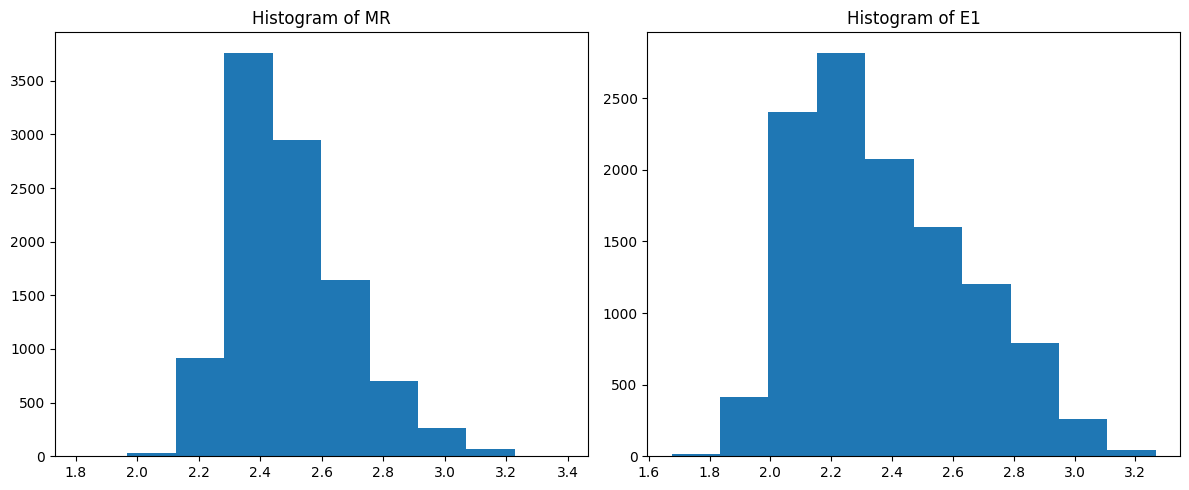

In [18]:
# Plot after transformation 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

for i, col_name in enumerate(missing_value_cols):
    axes[i].hist(all_train[col_name])
    axes[i].set_title(f'Histogram of {col_name}')

plt.tight_layout()
plt.show()

In [19]:
# Checking for missing values on the test dataset
(all_test.isnull().sum()/all_test.shape[0])*100

id         0.000000
Run        0.000000
Lumi       0.000000
Event      0.000000
MR        19.993034
Rsq        0.000000
E1         9.984907
Px1        0.000000
Py1        0.000000
Pz1        0.000000
E2         0.000000
Px2        0.000000
Py2        0.000000
Pz2        0.000000
HT         0.000000
MET        0.000000
nBJets     0.000000
dtype: float64

In [20]:
# Imputing the Missing values with the mean value
imp_median = SimpleImputer(missing_values=np.nan, strategy='mean')
all_train[['E1', 'MR']] = imp_median.fit_transform(all_train[['E1', 'MR']])

all_test['MR'] = np.log10(all_test['MR'])
all_test['E1'] = np.log10(all_test['E1'])
all_test[['E1', 'MR']] = imp_median.transform(all_test[['E1', 'MR']])

4. Feature Engineering

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
def create_buckets(data, cols, buckets = None): 
    if buckets is None: 
        for col in cols:
            data[col], buckets = pd.qcut(data[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], retbins=True, precision=0)
        return data, buckets
    else:
        for col in cols:
            data[col] = pd.cut(data[col], bins=buckets, labels=['Q1', 'Q2', 'Q3', 'Q4'], include_lowest=True)
        return data

col_to_bucket = ['Lumi']
train_bucketed, buckets = create_buckets(all_train, col_to_bucket)
test_bucketed = create_buckets(all_test, col_to_bucket, buckets)

In [23]:
def convert_to_categorical(data, cols, train = True): 
    if train:
         ohe_encoder = OneHotEncoder(sparse_output=False, drop='first')
         encoded_data = ohe_encoder.fit_transform(data[cols])
         dump(ohe_encoder, open('encoder.pkl', 'wb'))
    else:
         ohe_encoder = load(open('encoder.pkl', 'rb'))
         encoded_data = ohe_encoder.transform(data[cols])   
        
    column_names = ohe_encoder.get_feature_names_out(input_features=cols)
    encoded_df = pd.DataFrame(encoded_data, columns=column_names)
    data = data.drop(cols, axis=1)
    df = pd.concat([data, encoded_df], axis=1)
    
    return df

In [24]:
cols_to_encode = ['Run', 'nBJets', 'Lumi']
train_cat_encoded = convert_to_categorical(train_bucketed, cols_to_encode, train = True)
test_cat_encoded = convert_to_categorical(test_bucketed, cols_to_encode, train = False)

In [25]:
# Categorical Encoding for the train set 
factor = pd.factorize(train_cat_encoded["jets"])
train_cat_encoded["jets"] = factor[0]
defs = factor[1]

5. Model Building

In [26]:
from sklearn.model_selection import train_test_split

X = train_cat_encoded.drop(["jets", "id"], axis=1)
y = train_cat_encoded['jets']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [28]:
clf = RandomForestClassifier(n_estimators = 500, criterion = "entropy")
clf.fit(X_train, y_train)
preds = clf.predict(X_valid)
accuracy_score(preds, y_valid)

0.7649638802889577

6. Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

print(classification_report(preds, y_valid))


              precision    recall  f1-score   support

           0       0.49      0.65      0.55       832
           1       0.10      0.47      0.16        45
           2       0.94      0.80      0.87      2999

    accuracy                           0.76      3876
   macro avg       0.51      0.64      0.53      3876
weighted avg       0.83      0.76      0.79      3876



In [35]:
precision_macro = precision_score(preds, y_valid, average='macro')
recall_macro = recall_score(preds, y_valid, average='macro')
f1_macro = f1_score(preds, y_valid, average='macro')

precision_micro = precision_score(preds, y_valid, average='micro')
recall_micro = recall_score(preds, y_valid, average='micro')
f1_micro = f1_score(preds, y_valid, average='micro')

print('Macro-averaged precision:', precision_macro)
print('Macro-averaged recall:', recall_macro)
print('Macro-averaged F1-score:', f1_macro)

print('\nMicro-averaged precision:', precision_micro)
print('Micro-averaged recall:', recall_micro)
print('Micro-averaged F1-score:', f1_micro)

Macro-averaged precision: 0.5083764835885726
Macro-averaged recall: 0.6382334086433369
Macro-averaged F1-score: 0.5272960759512362

Micro-averaged precision: 0.7649638802889577
Micro-averaged recall: 0.7649638802889577
Micro-averaged F1-score: 0.7649638802889577


7. Model Improvement 

In [48]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris



# Define a grid of hyperparameters to search through
param_grid = {
    'n_estimators': [250, 500, 750, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score (Accuracy):", best_score)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Best Score (Accuracy): 0.7522638161209685


In [50]:
preds = grid_search.predict(X_valid)
print(classification_report(preds, y_valid))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56       840
           1       0.08      0.55      0.14        33
           2       0.94      0.80      0.87      3003

    accuracy                           0.77      3876
   macro avg       0.51      0.67      0.52      3876
weighted avg       0.84      0.77      0.79      3876

